# Introduction

#### To determine the best neighbothood in Pittsburgh we decided to find the safest neighborhood. We felt that the safest neighborhood would allow for the most optimal and comfortable space to live. We used three different data sets which were police incident blotter data, covid shots data, and firearm seizures data. We felt that these three different catorgoires were vital to a person trying to find the best neighborhood in a certain area.

## Metric one: Police Incidents

In [18]:
#Imports
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

#Style
plt.style.use('dark_background')

#Read csv files
covidShotsData = pd.read_csv("CovidShotsDataPerNeighborhood.csv")
FirearmSeizureData = pd.read_csv("FirearmSeizureData.csv")
policeIncidentData = pd.read_csv("PoliceIncidentBlotter.csv")
nmap = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

In [19]:
policeIncidentData.head()

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,-3218234799,22156251,0,2022-09-26T10:48:00,"200 Block Reifert St Pittsburgh, PA 15210",N,Knoxville,3,99,9999 9999 - (Misc. Incident):,3001.0,3.0,5.0,-79.992114,40.408138
1,291943355,22156290,0,2022-09-26T11:53:00,"5000 Block 2nd Ave Pittsburgh, PA 15207",Y,Hazelwood,4,99,9999 9999 - (Misc. Incident):,1515.0,5.0,3.0,-79.943686,40.408550
2,293365062,22165846,10,2022-10-13T07:35:00,"2000 Block 5th Ave Pittsburgh, PA 15219",N,Bluff,2,HARRASSMENT,2709 Harassment (Non-Specific),103.0,6.0,3.0,-79.977533,40.438011
3,293903564,22169167,6,2022-10-18T02:00:00,"500 Block Lockhart St Pittsburgh, PA 15212",N,East Allegheny,1,THEFT,"3924 Theft of Property Lost, Mislaid or Delive...",2304.0,1.0,1.0,-80.000065,40.452558
4,292498416,22159837,0,2022-10-02T13:00:00,"1600 Block Saw Mill Run Blvd Pittsburgh, PA 15210",N,Brookline,6,99,9999 9999 - (Misc. Incident):,3206.0,4.0,5.0,-80.000631,40.399967


In [20]:
#Creates a new dataframe with the neighborhood and # of recorded incidents
incidentDf = pd.DataFrame(policeIncidentData["INCIDENTNEIGHBORHOOD"].value_counts())
incidentDf.reset_index(inplace=True)
incidentDf.columns = ['Neighborhood', 'incidents']

incidentDf

,Neighborhood,incidents
0,Central Business District,253
1,South Side Flats,135
2,Carrick,105
3,Mount Washington,96
4,East Liberty,79
...,...,...
88,Summer Hill,2
89,Oakwood,2
90,Swisshelm Park,2
91,Outside County,1


In [21]:
#Displays the 15 neighborhoods with the least incidents
incidentDf.sort_values('incidents').head(15)

,Neighborhood,incidents
92,Ridgemont,1
91,Outside County,1
89,Oakwood,2
86,Regent Square,2
90,Swisshelm Park,2
88,Summer Hill,2
87,Hays,2
85,East Carnegie,3
84,Outside State,3
83,New Homestead,4


In [22]:
#Displays the 15 neighborhoods with the most incidents
incidentDf.sort_values('incidents', ascending=False).head(15)

,Neighborhood,incidents
0,Central Business District,253
1,South Side Flats,135
2,Carrick,105
3,Mount Washington,96
4,East Liberty,79
5,Brookline,79
6,Shadyside,72
7,Homewood North,63
8,Hazelwood,63
10,North Shore,61


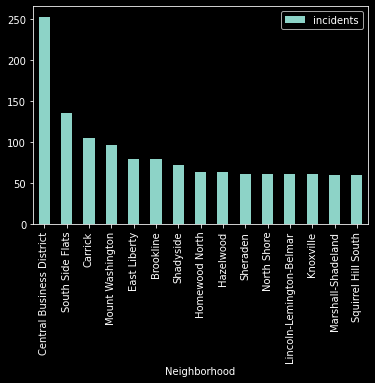

In [23]:
#Plots the 15 neighborhoods with the most incidents
incidentDf.set_index('Neighborhood').head(15).plot(kind='bar')

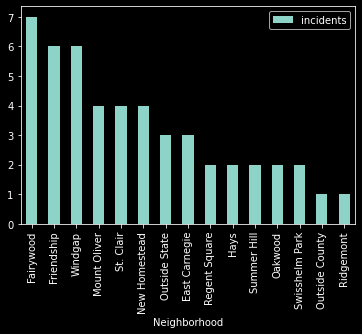

In [24]:
#Plots the 15 neighborhoods with the least incidents
incidentDf.set_index('Neighborhood').tail(15).plot(kind='bar')

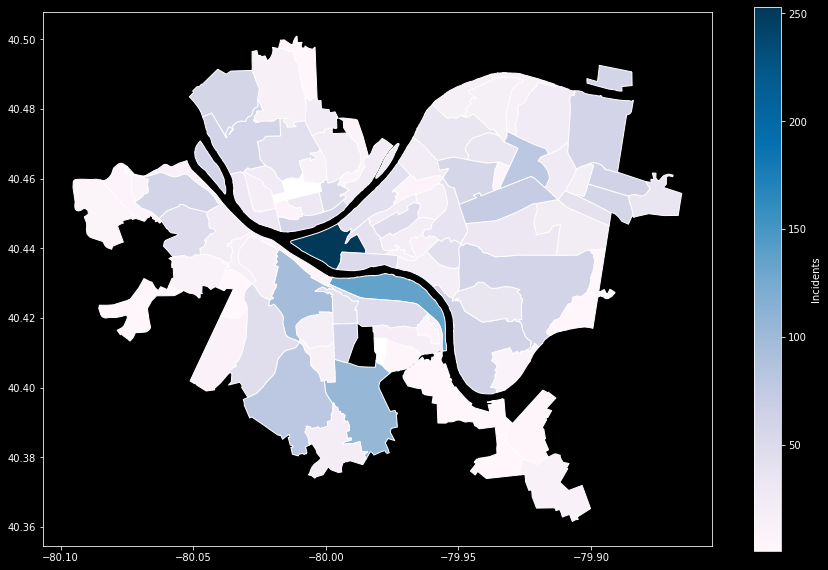

In [25]:
#Merges the map of pittsburgh with the police incident data
count_val = incidentDf.groupby("Neighborhood").sum('incidents')
count_map = nmap.merge(count_val, how='left', left_on='hood', right_on='Neighborhood')

#Displays the map
count_map.plot(column='incidents',
               cmap='PuBu',
               edgecolor="white",
               legend=True,
               legend_kwds={'label': "Incidents"},
               figsize=(15, 10),
               missing_kwds={"color": "white"}
               )

## Metric Two: Covid Shots

#### Importing pandas 

In [3]:
import pandas as pd

#### I read the CSV file that cotains the neighborhoods in Pittsburgh with the amount of COVID-19 vaccine shots for each of them. I chose this data set because a safe neighborhood should include people with COVID-19 vaccines to prevent the disease from spreading.

In [4]:
covidShotsData = pd.read_csv("CovidShotsDataPerNeighborhood.csv")

#### I displayed first five rows of dataframe.

In [5]:
covidShotsData.head()

,neighborhood_municipality,total_partially_vaccinated,total_fully_vaccinated,total_fully_vaccinated_w_booster
0,Bradford Woods,92,433,523
1,North Fayette,984,4577,3759
2,Garfield (Pittsburgh),359,1139,1071
3,Forward,81,468,425
4,Pine,1358,4930,5143


#### I displayed the top 15 neigborhoods with the least amount of totally fully vaccinated people with booster shots. I also decided to only consider data from the total_fully_vaccinated_w_booster column for each of the neighborhoods for my metric.

In [6]:
covidShotsData.sort_values('total_fully_vaccinated_w_booster').head(15)

,neighborhood_municipality,total_partially_vaccinated,total_fully_vaccinated,total_fully_vaccinated_w_booster
67,Mcdonald,2,1,0
86,Trafford,0,2,3
44,Chateau (Pittsburgh),8,24,14
191,Haysville,3,22,21
98,Arlington Heights (Pittsburgh),23,63,24
84,Undefined (Pittsburgh),4,24,25
32,St. Clair (Pittsburgh),27,81,43
95,Esplen (Pittsburgh),19,82,53
78,West End (Pittsburgh),28,84,58
144,South Shore (Pittsburgh),66,109,63


#### I displayed the top 15 neigborhoods with the most amount of totally fully vaccinated people with booster shots.

In [8]:
covidShotsData.sort_values('total_fully_vaccinated_w_booster').tail(15)

,neighborhood_municipality,total_partially_vaccinated,total_fully_vaccinated,total_fully_vaccinated_w_booster
35,Scott,1428,6444,6736
37,Squirrel Hill South (Pittsburgh),2395,5699,6736
118,Franklin Park,1363,5262,6853
27,Hampton,1486,6032,7865
87,Baldwin Borough,1362,7081,7938
153,Moon,2205,8967,8825
172,Plum,1689,8888,9437
168,Upper Saint Clair,1842,7253,9477
214,Monroeville,2400,9834,10174
204,Shaler,1727,8884,11623


#### I displayed a bar graph that shows the top 15 neighborhoods with the most amount of totally fully vaccinated people with booster shots.

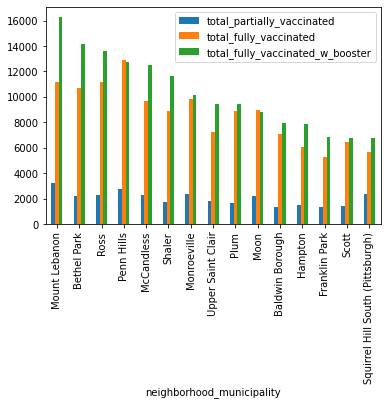

In [9]:
covidShotsData.set_index('neighborhood_municipality').nlargest(15, ['total_fully_vaccinated_w_booster']).plot(kind='bar')

#### I displayed a bar graph that shows the top 5 neighborhoods with the most amount of totally fully vaccinated people with booster shots.

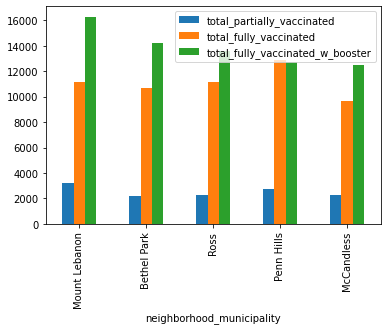

In [10]:
covidShotsData.set_index('neighborhood_municipality').nlargest(5, ['total_fully_vaccinated_w_booster']).plot(kind='bar')

#### I came to the conclusion for my dataset that involved just the fully vaccinated with booster column that Mount Lebanon is the safest neighborhood. Since this neighborhood had the most amount of people that were fully vaccinated with booster shots.

## Metric Three: Firearm Seizures

To determine the safest neighborhood, I compared the number of Pittsburgh police firearm seizures per neighborhood and the total number of firearms seized. A safe neighborhood should have little to no firearms seized, because that means that there are no unattended firearms that could get into the hands of the wrong person. Also, a high number of incidents where firearms were seized could mean that there were people in the area that were using the firearms for a potential criminal offence.

First, I imported pandas and matplotlib. I also imported FirearmSeizureData.csv into the variable "data".

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv("FirearmSeizureData.csv", parse_dates=True)

Next, I found the number of instances in each neighborhood through iteration and dictionaries. I then sorted the values in the dictionary from least number of instances to the greatest number of instances.

In [2]:
## Frequency of each neighborhood
freq = {}

for index, row in data.iterrows():
    hood = row['neighborhood']
    if hood not in freq:
        freq[hood] = 1
    else:
        freq[hood] += 1

## Sorts dictionary from least to greatest 
marklist = sorted(freq.items(), key=lambda x:x[1])
sortdict = dict(marklist)
print(sortdict)

{'Swisshelm Park': 1, 'Summer Hill': 2, 'Friendship': 3, 'Mt. Oliver': 3, 'Chartiers City': 4, 'Regent Square': 4, 'St. Clair': 4, 'Oakwood': 4, 'West End': 6, 'Mount Oliver Borough': 7, 'Fairywood': 7, 'Hays': 7, 'Arlington Heights': 8, 'Bon Air': 8, 'Lincoln Place': 8, 'Spring Garden': 9, 'Esplen': 9, 'Westwood': 10, 'Polish Hill': 10, 'Banksville': 10, 'Squirrel Hill North': 10, 'Upper Lawrenceville': 11, 'Windgap': 11, 'South Shore': 12, 'Morningside': 12, 'Lower Lawrenceville': 13, 'West Oakland': 13, 'Stanton Heights': 13, 'Glen Hazel': 13, 'North Oakland': 14, 'South Oakland': 15, 'Allegheny Center': 15, 'Duquesne Heights': 15, 'Allegheny West': 16, 'Central Oakland': 16, 'North Shore': 16, 'Point Breeze North': 17, 'Greenfield': 22, 'Chateau': 22, 'Strip District': 22, 'Central Lawrenceville': 22, 'Point Breeze': 23, 'Overbrook': 25, 'Shadyside': 25, 'Arlington': 28, 'Upper Hill': 28, 'California-Kirkbride': 29, 'Highland Park': 30, 'Perry North': 33, 'Troy Hill': 33, 'Squirrel

Then, I converted the dictionary into a dataframe. The graph shows each neighborhood and their firearm seizure incidents, from least to greatest.

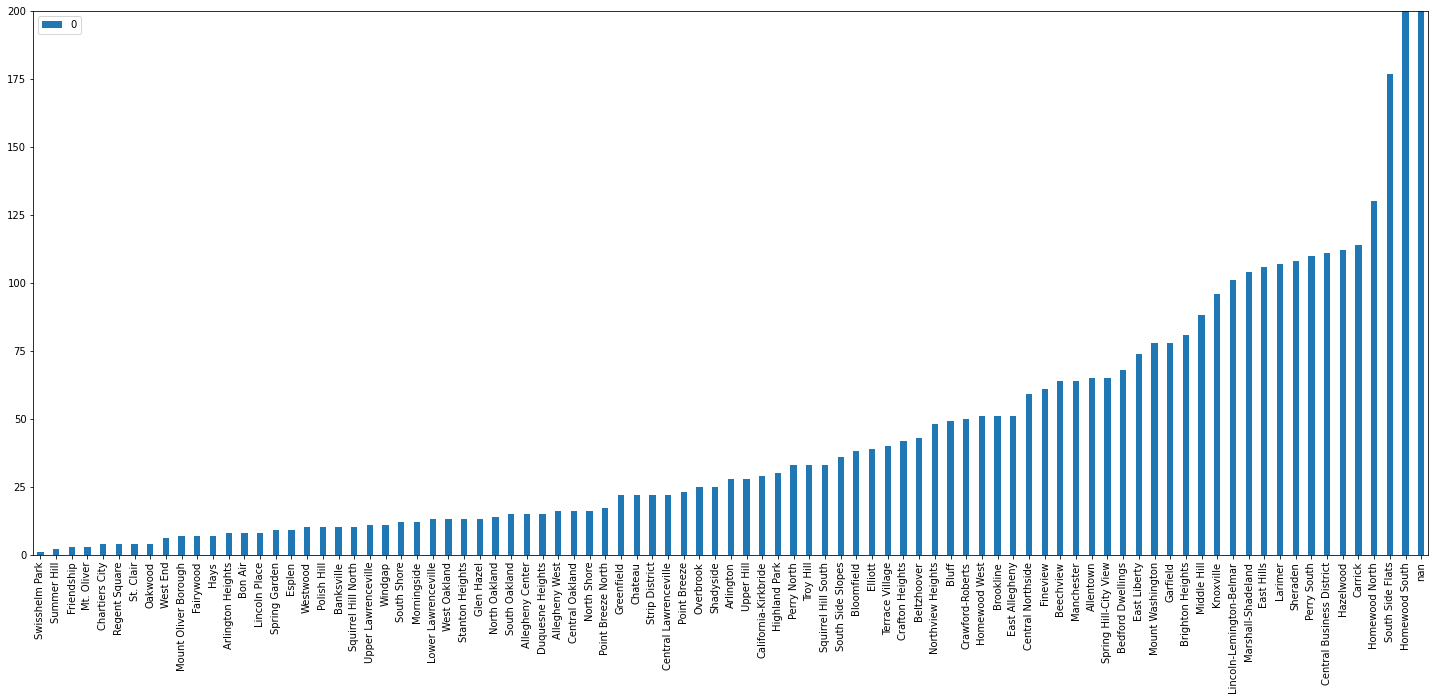

In [3]:
newDict = pd.DataFrame([sortdict])
newDict = newDict.T
newDict.plot(kind='bar', width = .4, figsize = (25,10), ylim = (0,200))

Finally, I plotted the data onto a bar graph to show the 5 neighborhoods with the least number of firearm seizures. The 5 from least to greatest were Swisshelm Park, Summer Hill, Friendship, Mt. Oliver, and Chartiers City.

                0
Swisshelm Park  1
Summer Hill     2
Friendship      3
Mt. Oliver      3
Chartiers City  4


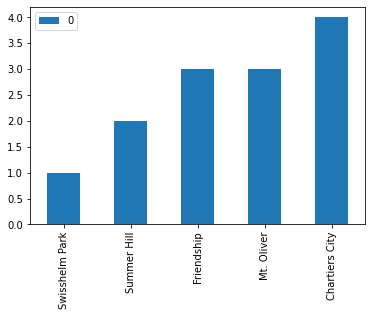

In [4]:
df = newDict.head(5)
print(df)
df.plot(kind='bar')

My final step is to take the number of total firearms seized per neighborhood, and compare the results to the number of incidents. I repeated the same process for total firearms seized.

Here, I found the total number of firearms seized per neighborhood. I sorted them from least to greatest in a dictionary.

In [5]:
## Finds total firearms seized per neighborhood
num = {}
for index, row in data.iterrows():
    hood = row['neighborhood']
    total = row['total_count']
    if hood not in num:
        num[hood] = total
    else:
        num[hood] += total

## Sorts totals
updated = sorted(num.items(), key=lambda x:x[1])
sortNum = dict(updated)
print(sortNum)

{'Summer Hill': 3, 'Mt. Oliver': 3, 'Swisshelm Park': 3, 'Chartiers City': 4, 'Regent Square': 4, 'Oakwood': 4, 'Friendship': 5, 'West End': 6, 'St. Clair': 7, 'Hays': 8, 'Mount Oliver Borough': 9, 'Fairywood': 9, 'Westwood': 10, 'Arlington Heights': 10, 'Polish Hill': 10, 'Banksville': 10, 'Lincoln Place': 10, 'Esplen': 10, 'Spring Garden': 11, 'Bon Air': 12, 'South Shore': 13, 'West Oakland': 14, 'Stanton Heights': 14, 'Squirrel Hill North': 14, 'Glen Hazel': 15, 'Windgap': 15, 'Lower Lawrenceville': 17, 'Allegheny West': 17, 'Allegheny Center': 17, 'Point Breeze North': 19, 'Duquesne Heights': 19, 'Upper Lawrenceville': 20, 'North Oakland': 20, 'Central Oakland': 20, 'North Shore': 20, 'South Oakland': 21, 'Strip District': 24, 'Greenfield': 25, 'Chateau': 26, 'Central Lawrenceville': 26, 'Morningside': 28, 'Overbrook': 29, 'Shadyside': 29, 'Point Breeze': 30, 'California-Kirkbride': 33, 'Upper Hill': 37, 'South Side Slopes': 39, 'Arlington': 40, 'Troy Hill': 40, 'Highland Park': 41

Next, I created a bar chart to represent the total number of firearms seized per neighborhood

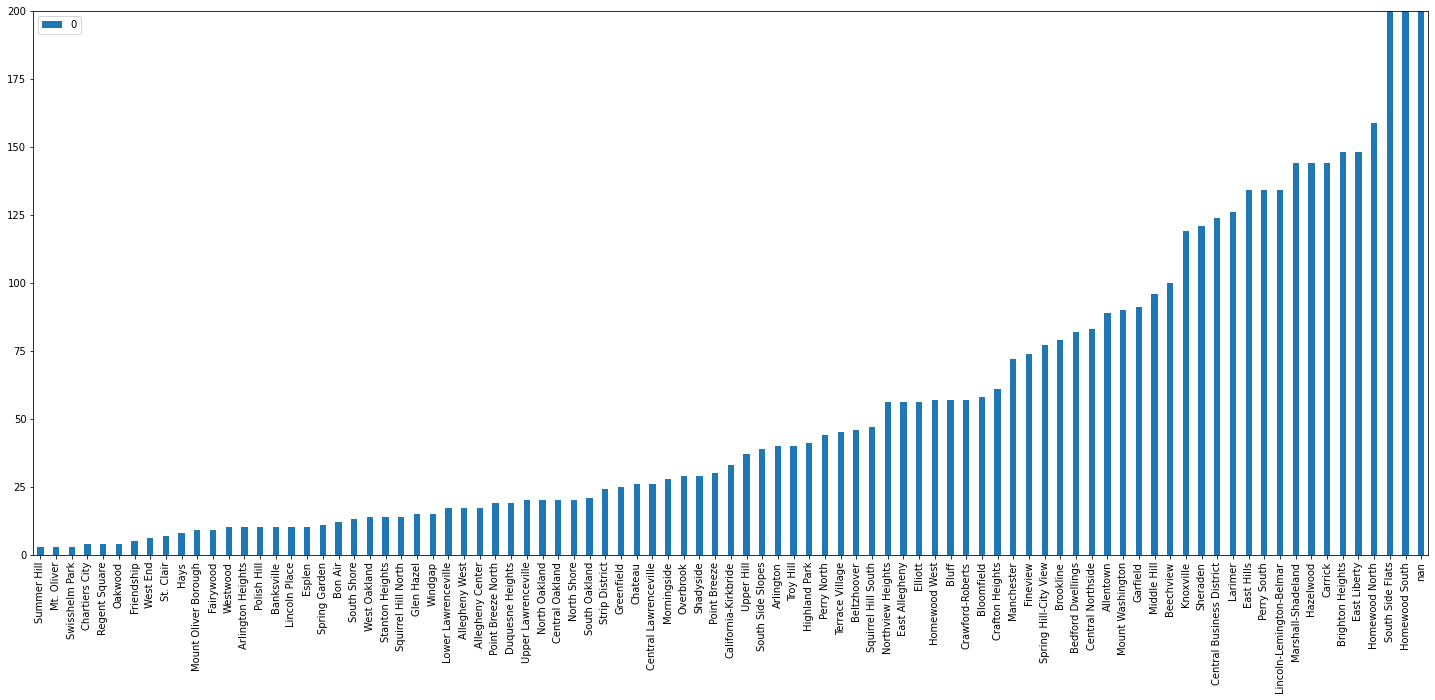

In [6]:
updateDict = pd.DataFrame([sortNum])
updateDict = updateDict.T
updateDict.plot(kind='bar', width = .4, figsize = (25,10), ylim = (0,200))

Finally, I created a dataframe for the top 5 lowest total firearms sezied, and plotted them on a bar graph.

                0
Summer Hill     3
Mt. Oliver      3
Swisshelm Park  3
Chartiers City  4
Regent Square   4


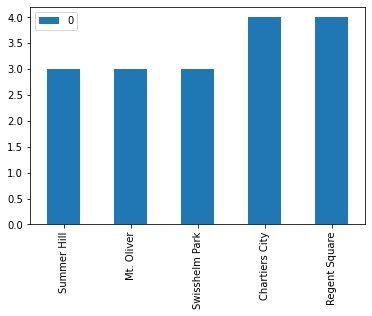

In [7]:
df2 = updateDict.head(5)
print(df2)
df2.plot(kind='bar')

The results point to Swisshelm Park being the safest neighborhood (off of this metric). It had the lowest number of firearm seizure incidents, and the joint-lowest number of total firearms seized.